# Word2Vec Tutorial
[GENSIM Tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#visualising-word-embeddings)

In [1]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)


In [2]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

2022-05-30 14:30:49,470 : INFO : loading projection weights from C:\Users\Francesco/gensim-data\word2vec-google-news-300\word2vec-google-news-300.gz
2022-05-30 14:31:31,470 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (3000000, 300) matrix of type float32 from C:\\Users\\Francesco/gensim-data\\word2vec-google-news-300\\word2vec-google-news-300.gz', 'binary': True, 'encoding': 'utf8', 'datetime': '2022-05-30T14:31:31.470006', 'gensim': '4.2.0', 'python': '3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'load_word2vec_format'}


In [4]:
for index, word in enumerate(wv.index_to_key):
    if index==100:
        break
    print(f'word {index} / {len(wv.index_to_key)} is {word}')

word 0 / 3000000 is </s>
word 1 / 3000000 is in
word 2 / 3000000 is for
word 3 / 3000000 is that
word 4 / 3000000 is is
word 5 / 3000000 is on
word 6 / 3000000 is ##
word 7 / 3000000 is The
word 8 / 3000000 is with
word 9 / 3000000 is said
word 10 / 3000000 is was
word 11 / 3000000 is the
word 12 / 3000000 is at
word 13 / 3000000 is not
word 14 / 3000000 is as
word 15 / 3000000 is it
word 16 / 3000000 is be
word 17 / 3000000 is from
word 18 / 3000000 is by
word 19 / 3000000 is are
word 20 / 3000000 is I
word 21 / 3000000 is have
word 22 / 3000000 is he
word 23 / 3000000 is will
word 24 / 3000000 is has
word 25 / 3000000 is ####
word 26 / 3000000 is his
word 27 / 3000000 is an
word 28 / 3000000 is this
word 29 / 3000000 is or
word 30 / 3000000 is their
word 31 / 3000000 is who
word 32 / 3000000 is they
word 33 / 3000000 is but
word 34 / 3000000 is $
word 35 / 3000000 is had
word 36 / 3000000 is year
word 37 / 3000000 is were
word 38 / 3000000 is we
word 39 / 3000000 is more
word 40 / 30

In [8]:
vec_king = wv['queen']

In [9]:
try:
    vec_cameroon = wv['cameroon']
except KeyError:
    print("The word 'cameroon' does not appear in this model")


The word 'cameroon' does not appear in this model


In [11]:
pairs = [
    ('car', 'minivan'),
    ('car', 'bicycle'),
    ('car', 'airplane'),
    ('car', 'cereal'),
    ('car', 'communism')
]

for w1, w2 in pairs:
    print('%r\t%r\t%.2f' % (w1, w2, wv.similarity(w1, w2)))

'car'	'minivan'	0.69
'car'	'bicycle'	0.54
'car'	'airplane'	0.42
'car'	'cereal'	0.14
'car'	'communism'	0.06


In [16]:
print(wv.most_similar(positive=['car', 'bike'], topn=5))

[('bicycle', 0.7798016667366028), ('scooter', 0.7793240547180176), ('motorcycle', 0.7453441023826599), ('bikes', 0.7298908233642578), ('vehicle', 0.6923801302909851)]


In [23]:
print(wv.doesnt_match(
    ['fire', 'land', 'water', 'sea', 'air', 'jar']))


jar


## Train your own model

In [24]:
from gensim.test.utils import datapath
from gensim import utils

class MyCorpus:
    """ An iterator that yields sentences (list of str)"""

    def __iter__(self):
        corpus_path = datapath('lee_background.cor')
        for line in open(corpus_path):
            # assume there's one document per line, tokens separated by whitespace
            yield utils.simple_preprocess(line)

In [25]:
import gensim.models

sentences  = MyCorpus()
model = gensim.models.Word2Vec(sentences=sentences)

2022-05-30 14:47:56,513 : INFO : collecting all words and their counts
2022-05-30 14:47:56,515 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-05-30 14:47:56,584 : INFO : collected 6981 word types from a corpus of 58152 raw words and 300 sentences
2022-05-30 14:47:56,585 : INFO : Creating a fresh vocabulary
2022-05-30 14:47:56,590 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 retains 1750 unique words (25.07% of original 6981, drops 5231)', 'datetime': '2022-05-30T14:47:56.590672', 'gensim': '4.2.0', 'python': '3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [MSC v.1929 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.22000-SP0', 'event': 'prepare_vocab'}
2022-05-30 14:47:56,591 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=5 leaves 49335 word corpus (84.84% of original 58152, drops 8817)', 'datetime': '2022-05-30T14:47:56.591685', 'gensim': '4.2.0', 'python': '3.10.2 (tags/v3.10.2:a58ebcc, Jan 17 2022, 14:12:15) [M

In [29]:
for index, word in enumerate(model.wv.index_to_key):
    if index==10:
        break
    print('%r\t%r' % (index, word))


0	'the'
1	'to'
2	'of'
3	'in'
4	'and'
5	'he'
6	'is'
7	'for'
8	'on'
9	'said'


## Visualizing Word Embedding

c:\Users\Francesco\Documents\XPUB\w2v\venv\lib\site-packages\sklearn\manifold\_t_sne.py:795: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\Francesco\Documents\XPUB\w2v\venv\lib\site-packages\sklearn\manifold\_t_sne.py:805: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



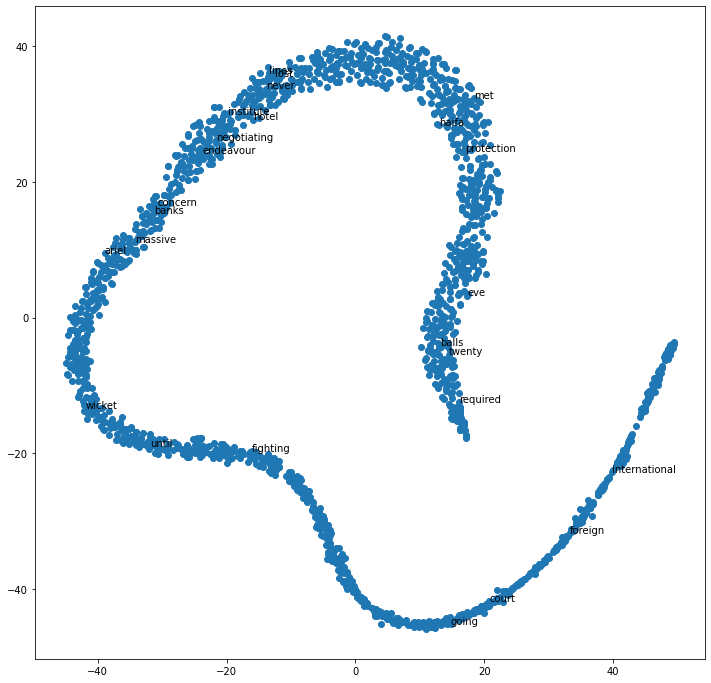

In [38]:
from sklearn.decomposition import IncrementalPCA # initial reduction
from sklearn.manifold import TSNE # final reduction
import numpy as np

def reduce_dimensions(model):
    num_dimensions = 2 # final num dimensions (2D, 3D, ecc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)

    # reducing using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')

def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    # random.seed(0)

    plt.figure(figsize=(12,12))
    plt.scatter(x_vals, y_vals)

    # label randomly subsampled 25 data points

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 25)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_plotly

# plot_function(x_vals, y_vals, labels)


plot_with_matplotlib(x_vals, y_vals, labels)


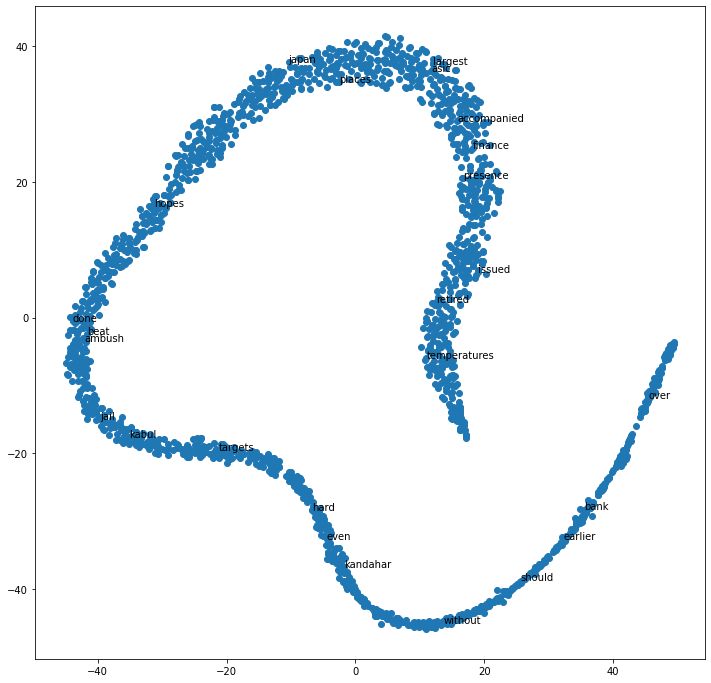

In [41]:
plot_with_matplotlib(x_vals, y_vals, labels)


In [42]:
plot_with_plotly(x_vals, y_vals, labels)